# Projet Data Visualisation

Choix du dataset libre (ex : Kaggle.com)

Ne prenez pas tous le même dataset, vous êtes 10, travaillez en binôme si vous le souhaitez.

Votre analyse sous forme de Jupyter Notebook devra contenir:
- Au moins 1 diagramme avec données continues ou discrètes, type nuage de point ou histogramme
- Au moins 1 pie chart pour données catégoriques
- 1 boîte à moustaches avec filtrage des données aberrantes sur le dataset
- 1 heat map avec matrice de corrélation

L'objectif est de faire un présentation de votre notebook pour jeudi.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np

print("lib loaded")

lib loaded


In [3]:
df = pd.read_csv("./DataSources/titanicdata.csv", sep=",")

print("dataset loaded")

df.head(10)

dataset loaded


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


- PassengerId (identifiant passager)
- Survived (0 : décédé, 1 : a survécu)
- Pclass (classe, de 1 à 3)
- Name (Nom, prénom et titre)
- Sex (male/female)
- Age (en années)
- SibSp (nombre de frère, soeur, beau-frère, belle soeur, mari ou femme)
- Parch (nombre de parents et d'enfants)
- Ticket (numéro du ticket)
- Fare (prix du ticket)
- Cabin (numéro de cabine)
- Embarked (port d'emarquement : C - Cherbourg, S - Southampton, Q = Queenstown)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


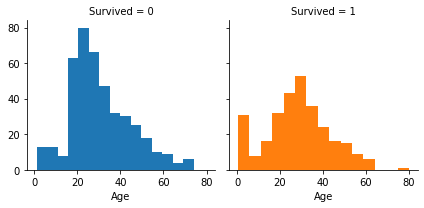

In [5]:
age_hist = sns.FacetGrid(df, col='Survived', hue='Survived')
age_hist.map(plt.hist, 'Age', bins=15)

<AxesSubplot:xlabel='Survived', ylabel='count'>

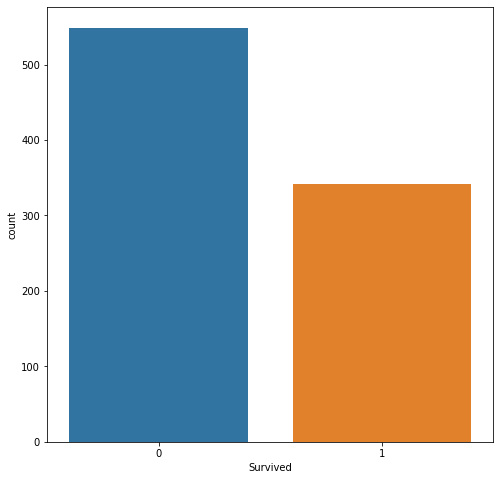

In [6]:
plt.figure(figsize=(8,8))
sns.countplot(x="Survived", data=df)

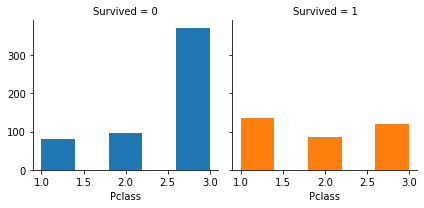

In [7]:
class_hist = sns.FacetGrid(df, col='Survived', hue='Survived')
class_hist.map(plt.hist, 'Pclass', bins=5)

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64


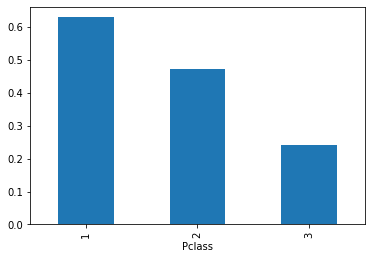

In [8]:
df.groupby('Pclass').Survived.mean().plot(kind='bar')
print (df.groupby('Pclass').Survived.value_counts())

<AxesSubplot:ylabel='Sex'>

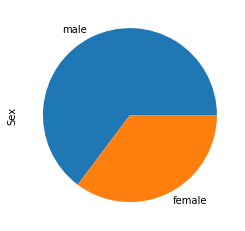

In [9]:
df.Sex.value_counts().plot(kind = 'pie')

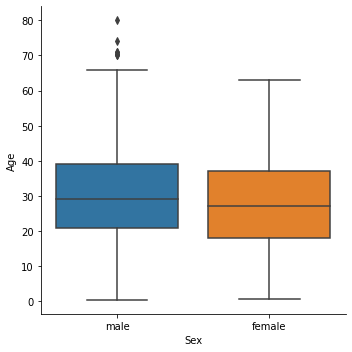

In [10]:
sns.catplot(x='Sex', y= 'Age',kind='box', data= df)
plt.show()

In [11]:
age = df[df['Age'].notna()]

age.head(10)
age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


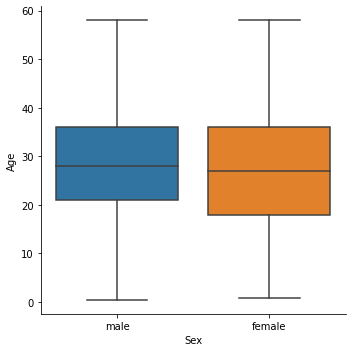

In [15]:
sns.catplot(x='Sex', y= 'Age',kind='box', data=age.query("Age<59"))
plt.show()

<AxesSubplot:>

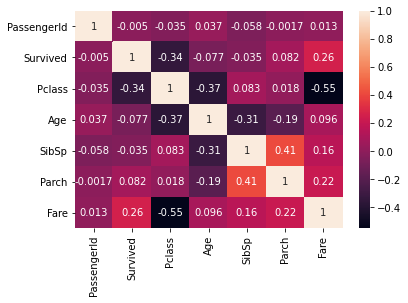

In [13]:
sns.heatmap(df.corr(), annot=True)